In [7]:
# HIDDEN
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
# datascience version number of last run of this notebook
version.__version__

'0.5.17'

<h1>Class 9: Economic growth, fluctuations, and health</h1>

What determines health?  For individuals, more income ought to improve health through purchases of health care and other healthy goods.  But we know that there must be more to the story than income alone, because even in nations in which health insurance and care are universally provided regardless of income, there still are gradients in health according to measures of socioeconomic status (SES) like education or income.

Still, one would expect that income and health should probably be positively correlated, whether in a tautological sense because of the strong SES gradients that we see, or because income causes health, or because health reverse-causes income, or because a third factor like technologica change may raise both health and income roughly simultaneously.

Are income and health always positively correlated?

Sometimes in developing countries and during the historical course of development, the answer might be no. Income may purchase unhealthy goods like overeating or tobacco products, or it are arive through industrialization and urbanization, both of which might reduce health in the short run through physical injuries and infectious disease.

What about in modern economies?  Is more GDP per capita always associated with better health?

Let's use the very helpful <a href="http://statsmodels.sourceforge.net/">Statsmodels</a> module and some <a href="http://pandas.pydata.org/">Pandas</a> functions to run a multivariate regression. 

In [8]:
import statsmodels.api as sm
import pandas as pd

We can still use `Table.read_table()` to input our data, but in order to use the data with Statsmodels, we'll have to translate data structures.

In [9]:
TableUSA = Table.read_table("http://demog.berkeley.edu/~redwards/Courses/LS88/c09_usa.csv")
TableUSA

year,rgdp,pop,rgdppc,e0f,e0m,e0b,logrgdppc,dlogrgdppc,de0f,de0m,de0b,ones
1934,862.2,1.25996e+08,6843.1,62.34,58.34,60.23,8.831,0.0999468,-0.44,-0.83,-0.65,1
1935,939,1.26834e+08,7403.37,63.04,58.96,60.89,8.90969,0.0786949,0.7,0.62,0.66,1
1936,1060.5,1.27682e+08,8305.77,62.6,58.35,60.35,9.02471,0.115015,-0.44,-0.61,-0.54,1
1937,1114.6,1.28467e+08,8676.18,63.37,59,61.05,9.06834,0.0436312,0.77,0.65,0.7,1
1938,1077.7,1.29355e+08,8331.32,64.54,60.45,62.39,9.02778,-0.0405601,1.17,1.45,1.34,1
1939,1163.6,1.30391e+08,8923.9,65.25,61.12,63.07,9.09649,0.0687119,0.71,0.67,0.68,1
1940,1266.1,1.31458e+08,9631.2,65.57,61.14,63.23,9.17276,0.0762742,0.32,0.02,0.16,1
1941,1490.3,1.3258e+08,11240.8,66.27,61.59,63.8,9.3273,0.15454,0.7,0.45,0.57,1
1942,1771.8,1.33567e+08,13265.3,67.17,62.26,64.59,9.49291,0.165603,0.9,0.67,0.79,1
1943,2073.7,1.34133e+08,15460,66.9,61.9,64.3,9.64601,0.153106,-0.27,-0.36,-0.29,1


Let's start with some visualizations. 

<font color="blue">Create scatter plots of:
<ol>
<li>life expectancy at birth for both sexes, `e0b`, versus `year`

<li>log real GDP per capita, `logrgdppc`, versus `year`

<li>life expectancy at birth for both sexes, `e0b`, versus log real GDP per capita, `logrgdppc`


</ol></font>

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


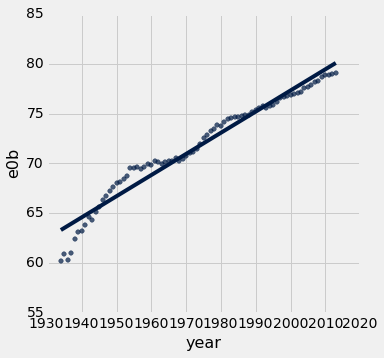

In [10]:
TableUSA.scatter('year','e0b', fit_line=True)

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


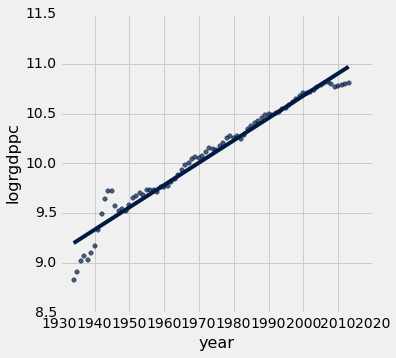

In [11]:
TableUSA.scatter('year','logrgdppc', fit_line=True)

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


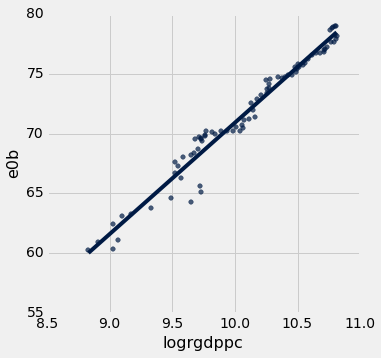

In [12]:
TableUSA.scatter('logrgdppc','e0b', fit_line=True)

<font color="blue">What do you see here? What are the natural of the general time trends in these variables, life expectancy and real GDP per capita?  What is the relationship between life expectancy and real GDP per capita in these graphs?</font>

Now consider what happens when we move from this model, which we just graphed,

$$e0_t = \alpha + \beta \ log \ y_t + \epsilon_t$$

to a new model where we have $differenced$ the first model:

$$e0_t = \alpha + \beta \ log \ y_t + \epsilon_t$$
$$e0_{t-1} = \alpha + \beta \ log y_{t-1} + \epsilon_{t-1}$$

$$e0_t - e0_{t-1} = \left[ \alpha + \beta \ log y_t + \epsilon_t\right] - \left[\alpha + \beta \ log \ y_{t-1} + \epsilon_{t-1}\right]$$

$$e0(t) - e0_{t-1} = \beta \left(log \ y(t)  - log y_{t-1} \right) + \epsilon_t - \epsilon_{t-1}$$

Finally, let's introduce $\Delta$ as the differencing operator, and recognize that because $\epsilon$ is a white-noise error with mean zero, then the difference of two epsilons is just another white-noise error with mean zero, let's call it $\nu$:

$$\Delta e0(t) = \beta \Delta log \ y(t) + \nu_t$$

What have we found? Our equation in levels implies an equation in differences with the same slope, $\beta$. Do we in fact see the same slope $\beta$ as we should?

<font color="blue">Create a scatter plot of `dlogrgdppc` against `de0b`.  Make super sure to include a trend line (`fit_line=True`)</font>

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


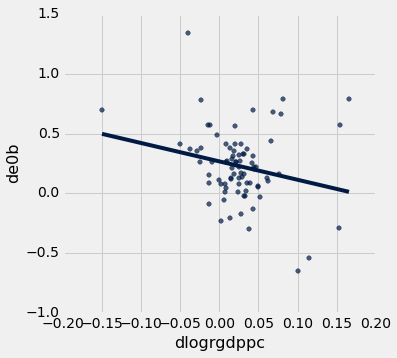

In [13]:
TableUSA.scatter('dlogrgdppc','de0b', fit_line=True)

<font color="blue">Describe what you see.  Discuss how it fits or does not fit with what you'd found earlier. Do you see the same $\beta$ or a different one?  What could be going on?</font>

Let's also run ordinary least squares here and talk about the results, to help with hypothesis testing. First, let's switch data structures so we can use pandas. Below, the `.to_df()` method generates a Pandas dataframe containing the same data as the table.

In [14]:
USA = TableUSA.to_df()
type(USA)

pandas.core.frame.DataFrame

In [15]:
# Our x variable is log real GDP per capita
x = USA[['ones','logrgdppc']]
y = USA['e0b']
multiple_regress = sm.OLS(y, x).fit()
multiple_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    e0b   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2169.
Date:                Mon, 04 Apr 2016   Prob (F-statistic):           1.10e-58
Time:                        02:16:45   Log-Likelihood:                -108.06
No. Observations:                  80   AIC:                             220.1
Df Residuals:                      78   BIC:                             224.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ones         -22.2893      2.021    -11.029      0.000       -26.313   -18.266
logrgdppc      9.3191      0.200     46.570      0.000         8.921     9.717
==============================================================================
Omnibus:                       25.079   Durbin-Watson:                   0.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.521
Skew:                          -1.215   Prob(JB):                     5.84e-10
Kurtosis:                       5.617   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color = "blue">Discuss what you see. Is the R-squared high or low?  Is the $\beta$ coefficient statistically significantly different from zero?</font>

<font color = "blue">Now run OLS on the change in life expectancy at birth, `de0b`, as a function of the change in log real GDP per capita, `dlogrgdppc`.  
</font>

(You can try leaving out the constant term, which theory suggests might be the right thing to do, by leaving out the `ones` vector, or you can leave it in. But you will get a different answer if you leave it out! I'd go ahead and leave it in.)

In [16]:
# Our x variable is log real GDP per capita
dx = USA[['ones','dlogrgdppc']]
dy = USA['de0b']
multiple_regress = sm.OLS(dy, dx).fit()
multiple_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   de0b   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.123
Date:                Mon, 04 Apr 2016   Prob (F-statistic):             0.0457
Time:                        02:16:47   Log-Likelihood:                -15.786
No. Observations:                  80   AIC:                             35.57
Df Residuals:                      78   BIC:                             40.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ones           0.2668      0.039      6.887      0.000         0.190     0.344
dlogrgdppc    -1.5386      0.758     -2.030      0.046        -3.047    -0.030
==============================================================================
Omnibus:                       10.150   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.448
Skew:                           0.592   Prob(JB):                      0.00198
Kurtosis:                       4.527   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color = "blue">Discuss what you see. Is the R-squared high or low?  Is the $\beta$ coefficient statistically significantly different from zero?</font>

<font color = "blue">Write about what you have found. What makes sense to you? What doesn't? What is important in regression output, what isn't?</font>

<h2>Are different periods different?</h2>

Consider Sweden, which has a very long history of good records, with life expectancy and GDP statistics available back to 1820. Should we expect to see different results in that era? Let's look at Swedish data from 1821 to 1913.

In [18]:
TableSWE = Table.read_table("http://demog.berkeley.edu/~redwards/Courses/LS88/c09_sweden1913.csv")
TableUSA

year,rgdp,pop,rgdppc,e0f,e0m,e0b,logrgdppc,dlogrgdppc,de0f,de0m,de0b,ones
1934,862.2,1.25996e+08,6843.1,62.34,58.34,60.23,8.831,0.0999468,-0.44,-0.83,-0.65,1
1935,939,1.26834e+08,7403.37,63.04,58.96,60.89,8.90969,0.0786949,0.7,0.62,0.66,1
1936,1060.5,1.27682e+08,8305.77,62.6,58.35,60.35,9.02471,0.115015,-0.44,-0.61,-0.54,1
1937,1114.6,1.28467e+08,8676.18,63.37,59,61.05,9.06834,0.0436312,0.77,0.65,0.7,1
1938,1077.7,1.29355e+08,8331.32,64.54,60.45,62.39,9.02778,-0.0405601,1.17,1.45,1.34,1
1939,1163.6,1.30391e+08,8923.9,65.25,61.12,63.07,9.09649,0.0687119,0.71,0.67,0.68,1
1940,1266.1,1.31458e+08,9631.2,65.57,61.14,63.23,9.17276,0.0762742,0.32,0.02,0.16,1
1941,1490.3,1.3258e+08,11240.8,66.27,61.59,63.8,9.3273,0.15454,0.7,0.45,0.57,1
1942,1771.8,1.33567e+08,13265.3,67.17,62.26,64.59,9.49291,0.165603,0.9,0.67,0.79,1
1943,2073.7,1.34133e+08,15460,66.9,61.9,64.3,9.64601,0.153106,-0.27,-0.36,-0.29,1


In [19]:
SWE = TableSWE.to_df()
type(USA)

pandas.core.frame.DataFrame

<font color="blue">Feel free to do other things, like plot the data, but my suggestion is to cut to the chase and run OLS.</font>

<font color="blue">Run OLS on the levels of `e0b` as a linear function of `logrgdppc`</font>

In [20]:
# Our x variable is log real GDP per capita
xswe = SWE[['ones','logrgdppc']]
yswe = SWE['e0b']
multiple_regress = sm.OLS(yswe, xswe).fit()
multiple_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    e0b   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     480.1
Date:                Mon, 04 Apr 2016   Prob (F-statistic):           4.63e-38
Time:                        02:17:33   Log-Likelihood:                -207.55
No. Observations:                  93   AIC:                             419.1
Df Residuals:                      91   BIC:                             424.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ones         -51.2530      4.490    -11.414      0.000       -60.173   -42.333
logrgdppc     13.6370      0.622     21.910      0.000        12.401    14.873
==============================================================================
Omnibus:                       15.739   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.120
Skew:                          -0.729   Prob(JB):                     5.79e-06
Kurtosis:                       5.025   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color="blue">Now run OLS on the differences, `de0b` as a linear function of `dlogrgdppc`</font>

In [21]:
# Our x variable is log real GDP per capita
dxswe = SWE[['ones','dlogrgdppc']]
dyswe = SWE['de0b']
multiple_regress = sm.OLS(dyswe, dxswe).fit()
multiple_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   de0b   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.475
Date:                Mon, 04 Apr 2016   Prob (F-statistic):             0.0371
Time:                        02:17:34   Log-Likelihood:                -217.53
No. Observations:                  93   AIC:                             439.1
Df Residuals:                      91   BIC:                             444.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ones          -0.0254      0.284     -0.090      0.929        -0.589     0.538
dlogrgdppc    36.2394     17.131      2.115      0.037         2.210    70.269
==============================================================================
Omnibus:                        7.561   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.023   Jarque-Bera (JB):               13.330
Skew:                           0.180   Prob(JB):                      0.00127
Kurtosis:                       4.820   Cond. No.                         65.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color = "blue">Write about what you have found. What makes sense to you? What doesn't? What is the same in Sweden 1821-1913 as it was in the modern U.S.?  What is different?</font>